# Rock vs Mines Analysis

## Packages

In [6]:
#!pip install tensorflow
#!pip install keras
#!pip install scikeras

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
#from keras.utils import np_utils
from keras import optimizers
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import SGD

In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
tf.__version__

'2.15.0'

In [4]:
seed = 10
np.random.seed(seed)

## Dataset

In [9]:
data = pd.read_csv(r"Dataset\sonar.csv", header= None)

In [8]:
data[60].value_counts() #Mines and Rocks

60
M    111
R     97
Name: count, dtype: int64

In [10]:
dataset = data.values
dataset

array([[0.02, 0.0371, 0.0428, ..., 0.009, 0.0032, 'R'],
       [0.0453, 0.0523, 0.0843, ..., 0.0052, 0.0044, 'R'],
       [0.0262, 0.0582, 0.1099, ..., 0.0095, 0.0078, 'R'],
       ...,
       [0.0522, 0.0437, 0.018, ..., 0.0077, 0.0031, 'M'],
       [0.0303, 0.0353, 0.049, ..., 0.0036, 0.0048, 'M'],
       [0.026, 0.0363, 0.0136, ..., 0.0061, 0.0115, 'M']], dtype=object)

In [11]:
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

## Data Treatment

In [12]:
encoder = LabelEncoder()
encoder.fit(Y)

LabelEncoder()

In [13]:
encoded_Y = encoder.transform(Y)

In [14]:
encoded_Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
encoded_Y.shape

(208,)

## Model

In [ ]:
model = Sequential()

In [17]:
model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
model.add(Dense(30, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                3660      
                                                                 
 dense_1 (Dense)             (None, 30)                1830      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 5811 (22.70 KB)
Trainable params: 5811 (22.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
def create_baseline():
    # Creating model
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    #Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [21]:
create_baseline()

In [22]:
estimator = KerasClassifier(build_fn=model, epochs=10, batch_size=5, verbose=1)
estimator

KerasClassifier(
	model=None
	build_fn=<keras.src.engine.sequential.Sequential object at 0x0000026A0404A250>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=5
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

## Stratified k-fold

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)

### Results

In [24]:
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 75.90% (10.81%)


### Graph

In [25]:
import matplotlib.pyplot as plt

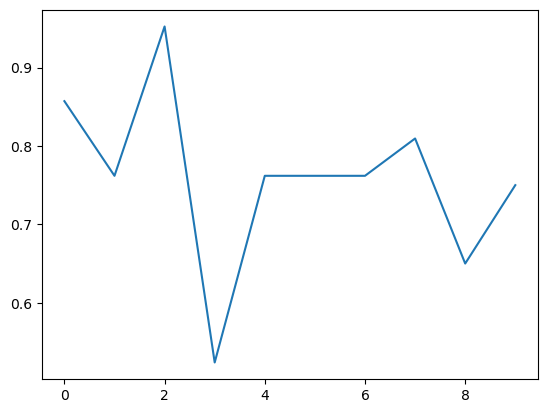

In [27]:
plt.plot(results)

## Training and Test Sets

In [28]:
X_train_s, X_test_s, Y_train_s, Y_test_s = model_selection.train_test_split(X, Y, test_size=0.20, random_state=seed)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, encoded_Y, test_size=0.20, random_state=seed)

### Results

In [ ]:
estimator.fit(X_train, Y_train)

In [ ]:
predictions = estimator.predict(X_test)
print(predictions)

In [31]:
predictions_encoded = encoder.inverse_transform(predictions)
print(predictions_encoded)

['R' 'R' 'R' 'M' 'R' 'R' 'M' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'R' 'M' 'R' 'R'
 'M' 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'R' 'M' 'R' 'R' 'R' 'M' 'R' 'M'
 'M' 'R' 'M' 'R' 'R' 'M']


In [32]:
print(accuracy_score(Y_test_s, predictions_encoded))
print(accuracy_score(Y_test, predictions))

0.7619047619047619
0.7619047619047619


### Adjusting Neural Network's weights

In [33]:
tf.keras.optimizers.SGD #Adjusting weights

keras.src.optimizers.sgd.SGD

In [34]:
def create_model1():
    # Creating Model
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile Model
    sgd = SGD(lr=0.01) #SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
    return model

In [35]:
estimator1 = KerasClassifier(build_fn=create_model1, epochs=10, batch_size=5, verbose=1)
estimator1

KerasClassifier(
	model=None
	build_fn=<function create_model1 at 0x0000026A0F7F7600>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=5
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator1, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
estimator1.fit(X_train, Y_train)

In [38]:
predictions1 = estimator1.predict(X_test)

9/9 [==============================] - 0s 995us/step


In [39]:
print(accuracy_score(Y_test, predictions1))

0.42857142857142855


In [41]:
def create_model2():
    # Creating Model
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(50, kernel_initializer='normal', activation='relu'))
    model.add(Dense(40, kernel_initializer='normal', activation='relu'))
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile Modelo
    sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [42]:
estimator2 = KerasClassifier(build_fn=create_model2, epochs=100, batch_size=15, verbose=1)

In [ ]:
estimator2.fit(X_train, Y_train)

In [44]:
predictions2 = estimator2.predict(X_test)

3/3 [==============================] - 0s 3ms/step


In [45]:
print(accuracy_score(Y_test, predictions2))

0.42857142857142855
